In [5]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import linregress
from scipy.optimize import curve_fit
import scipy.stats as stats
import numpy as np
import pandas as pd

# Load and Split Dataframes

In [21]:
y1 = [0.000607721, 0.122101924, 0.159816368, 0.376315982, 0.378551072, 0.800341819, 0.816660047]
y2 = [0.000853373, 0.122917055, 0.159278324, 0.379867124, 0.37247007, 0.791999613, 0.81488507]
y3 = [0.000435563, 0.121974322, 0.159900363, 0.378946702, 0.37429263, 0.792889925, 0.81792172]

y = [0.000632219, 0.1223311, 0.159665018, 0.378376603, 0.375104591, 0.795077119, 0.816488945]
sd = [0.00020998, 0.000511447, 0.00033751, 0.001842936, 0.003120754, 0.004581044, 0.001525539]
c = [0.00, 5.203, 10.406, 20.812, 31.218, 41.624, 52.03]

# Plot Fucntions

## Individual Plots

In [22]:
def plot(y, c):
    """
    Plot individual calibration curve with linear regression for 
    a single wavelength measurment (single dataframe) 
    
    Parameters
    ----------
    df: pd.DataFrame object
        must contain a blank + 6 standard concentraions, 
        specify the rows if necessary
    """
    
    zero = y[0]
    y = [i - zero for i in y]
    print(f'y values: {y}')
    print(f'x values: {c}')

    x = np.array(c)
    y = np.array(y)

    def model(x, m):
        return m * x

    slope, _ = curve_fit(model, x, y)
    slope = slope[0]

    x_space = np.linspace(min(x), max(x), 1000)
    y_fit = slope * x_space

    ss_res = np.sum((y - (slope * x))**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    ss_tot_null = np.sum(y**2)  
    r2 = 1 - (ss_res / ss_tot)
    r2_null = 1 - (ss_res / ss_tot_null)
    print(f"r2: {r2}")
    print(f"r2_null: {r2_null}")

    fig, ax = plt.subplots()
    ax.plot(c, y, marker='o', linestyle='')
    ax.plot(x_space, y_fit, 'k--', label=f'y={slope:.3f}x, R^2 = {r2_null:.5f}')
            
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel('Intensity')
    ax.set_xlabel('Concentration (ppb)')
    ax.set_title(f'Standard Curve')
    ax.grid(True)
    ax.legend()
    plt.savefig('standard.png')

y values: [0.0, 0.121698881, 0.159032799, 0.377744384, 0.374472372, 0.7944449, 0.815856726]
x values: [0.0, 5.203, 10.406, 20.812, 31.218, 41.624, 52.03]
r2: 0.9428987383031218
r2_null: 0.9780844363197214


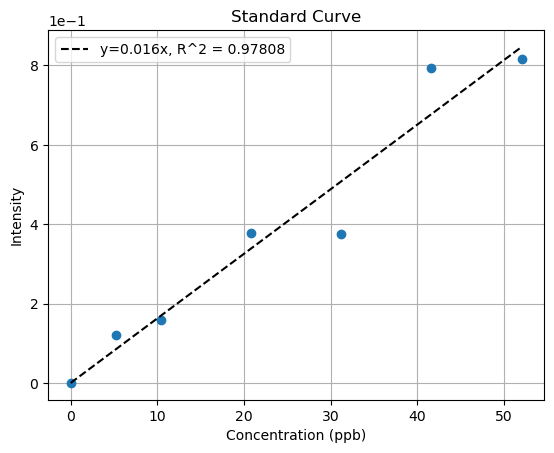

In [23]:
plot(y, c)

In [24]:
def plot_errorbar(y, c, sd):
    """
    Plot individual calibration curve with linear regression for 
    a single wavelength measurment (single dataframe) 
    
    Parameters
    ----------
    df: pd.DataFrame object
        must contain a blank + 6 standard concentraions, 
        specify the rows if necessary
    """
    
    zero = y[0]
    y = [i - zero for i in y]
    print(f'y values: {y}')
    print(f'x values: {c}')

    x = np.array(c)
    y = np.array(y)

    def model(x, m):
        return m * x

    slope, _ = curve_fit(model, x, y)
    slope = slope[0]

    x_space = np.linspace(min(x), max(x), 1000)
    y_fit = slope * x_space

    ss_res = np.sum((y - (slope * x))**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    ss_tot_null = np.sum(y**2)  
    r2 = 1 - (ss_res / ss_tot)
    r2_null = 1 - (ss_res / ss_tot_null)
    print(f"r2: {r2}")
    print(f"r2_null: {r2_null}")

    fig, ax = plt.subplots()
    ax.plot(c, y, marker='o', linestyle='')
    ax.plot(x_space, y_fit, 'k--', label=f'y={slope:.3f}x, R^2 = {r2_null:.5f}')
    ax.errorbar(x, y, yerr=sd, fmt='none', label='error', capsize=4, color='tab:red')
            
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel('Intensity')
    ax.set_xlabel('Concentration (ppb)')
    ax.set_title(f'Standard Curve')
    ax.grid(True)
    ax.legend()
    plt.savefig('standard_error.png')

y values: [0.0, 0.121698881, 0.159032799, 0.377744384, 0.374472372, 0.7944449, 0.815856726]
x values: [0.0, 5.203, 10.406, 20.812, 31.218, 41.624, 52.03]
r2: 0.9428987383031218
r2_null: 0.9780844363197214


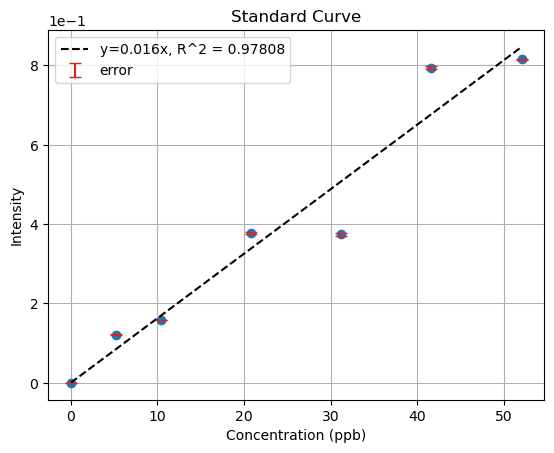

In [25]:
plot_errorbar(y, c, sd)

# Slope, R^2, Limit of Detection

In [35]:
def m_r2_lod(y, c, ms, r2s, lods):
    """
    Calculate slope (ms), regression value (r2s), and
    limit of detection values (lods) for each wavelenth
    
    Parameters
    ----------
    dfs: list of pd.DataFrame object
        each dataframe must contain a blank + 6 standard 
        concentraions, specify the rows if necessary
    ms: list
        slope for each wavelengths
    r2s: list
        r^2 for each wavelengths
    lods: list
        limit of detection for each wavelengths
    """
    y = np.array(y)
    c = np.array(c)

    zero = y[0]
    y = y - zero
    x = c
    
    def model(x, m):
        return m * x

    slope, _ = curve_fit(model, x, y)
    slope = slope[0]

    y_pred = slope * x

    residuals = y - y_pred
    
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    ss_tot_null = np.sum(y**2)  

    r2 = 1 - (ss_res / ss_tot_null)

    n = len(x)
    sigma_y = np.sqrt(ss_res / (n - 1))

    lod = 3 * sigma_y / slope

    return slope, r2, lod

In [36]:
ms = []
r2s = []
lods = []

m_r2_lod(y, c, ms, r2s, lods)


(0.01627298442927198, 0.9780844363197214, 14.180245217382124)

# Sample concentration

In [37]:
def CI(conc, sd, n): # 95% confidence interval two tailed
    n = 3
    dof = n - 1

    se = sd / np.sqrt(n)
    t = stats.t.ppf(0.975, dof)
    ci = t * se
    print(f'concentration: {conc} ± {ci} ppm; sd: {sd} ppm')

In [39]:
CI(25.69427521, 0.223280793, 3)
CI(5.009396466, 0.016273316, 3)

concentration: 25.69427521 ± 0.5546602381939455 ppm; sd: 0.223280793 ppm
concentration: 5.009396466 ± 0.04042515797032907 ppm; sd: 0.016273316 ppm
